<a href="https://colab.research.google.com/github/ParitKansal/FineTunning/blob/main/Gemma_OCR_Finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install trl bitsandbytes peft

In [8]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/FSL_2025/new_initiative/data/Invoice_Data_Extracted.xlsx")

In [9]:
df['field_name'].nunique()

57

In [10]:
df.head()

,filename,vendor_name,field_name,ground_truth
0,GHX9J0EIM.007_002.jpg,MEDLINE INDUSTRIES INC,INV_VendorFullName,"Medline Industries, LP"
1,GHX9J0EIM.008_002.jpg,MEDLINE INDUSTRIES INC,INV_VendorFullName,"Medline Industries, LP"
2,GHX9H0M7M.015_002.jpg,MEDLINE INDUSTRIES INC,INV_VendorFullName,"Medline Industries, LP"
3,GHX9J0C5M.001_002.jpg,MEDLINE INDUSTRIES INC,INV_VendorFullName,"Medline Industries, LP"
4,GHX9K0FQM.011_002.jpg,MEDLINE INDUSTRIES INC,INV_VendorFullName,"Medline Industries, LP"


In [11]:
# Get unique filenames and field names
filenames = df['filename'].unique()
field_names = df['field_name'].unique()

# Final dictionary
result = {}

for file_name in filenames:
    temp = df[df['filename'] == file_name]
    result[file_name] = {}
    for field_name in field_names:
        temp_df = temp[temp['field_name'] == field_name]
        if not temp_df.empty:
            # take first value (or join if multiple)
            value = temp_df['ground_truth'].iloc[0]
        else:
            value = ""  # empty string if not present
        result[file_name][field_name] = value

In [12]:
import json
for key in result.keys():
  result[key] = json.dumps(result[key])

In [13]:
result['GHX9K02DS.001_001.jpg']

'{"INV_VendorFullName": "Boston Scientific Corporation", "INV_InvoiceNumber": 701873316, "INV_PurchaseOrderNo": 588199, "INV_InvoiceDate": 45635, "INV_AccountNumber": 316869, "INV_VAT": 0, "INV_ShipToAddress1": "1604 6TH AVE S DOCK A", "INV_ShipToState": "AL", "INV_ShipToPostCode": 35233, "INV_TotalAmount": 4407, "INV_ShipToFullName": "CHILDRENS HOSPITAL", "INV_ExtdPrice_0": 2195, "INV_Description_0": "S MEGATRON US MR 5.00 X 20MM", "INV_VendorCatalogNo_0": "H7493942820500", "INV_Quantity_0": -1, "INV_ExtdPrice_1": 2195, "INV_Description_1": "S MEGATRON US MR 5.00 X 16MM", "INV_VendorCatalogNo_1": "H7493942816500", "INV_Quantity_1": "-", "INV_ExtdPrice_2": "", "INV_Description_2": "", "INV_VendorCatalogNo_2": "", "INV_Quantity_2": "", "INV_ShipToCity": "BIRMINGHAM", "INV_UOM_1": "", "INV_FreightCharge": 17, "INV_UOM_0": "", "INV_ExtdPrice_3": "", "INV_Description_3": "", "INV_VendorCatalogNo_3": "", "INV_Quantity_3": "", "INV_ExtdPrice_4": "", "INV_Description_4": "", "INV_VendorCatalo

In [14]:
df.head()

,filename,vendor_name,field_name,ground_truth
0,GHX9J0EIM.007_002.jpg,MEDLINE INDUSTRIES INC,INV_VendorFullName,"Medline Industries, LP"
1,GHX9J0EIM.008_002.jpg,MEDLINE INDUSTRIES INC,INV_VendorFullName,"Medline Industries, LP"
2,GHX9H0M7M.015_002.jpg,MEDLINE INDUSTRIES INC,INV_VendorFullName,"Medline Industries, LP"
3,GHX9J0C5M.001_002.jpg,MEDLINE INDUSTRIES INC,INV_VendorFullName,"Medline Industries, LP"
4,GHX9K0FQM.011_002.jpg,MEDLINE INDUSTRIES INC,INV_VendorFullName,"Medline Industries, LP"


In [15]:
vendors = []
for key in result.keys():
    temp = df[df['filename'] == key]
    if not temp.empty and 'vendor_name' in temp.columns:
        vendors.append(temp['vendor_name'].iloc[0])
    else:
        vendors.append("")

print(len(vendors))

300


In [16]:
from datasets import Dataset, Features, Image, Value
import pandas as pd

# Build full image paths
image_paths = [
    "/content/drive/MyDrive/FSL_2025/new_initiative/data/Invoice_Data/Invoice_Data/" + fname
    for fname in result.keys()
]

# Build dataframe
df_result = pd.DataFrame({
    "image": image_paths,
    "ground_truth": list(result.values()),  # JSON strings
    "vendors": vendors
})

# Define dataset features
features = Features({
    "image": Image(),
    "ground_truth": Value("string"),
    "vendors": Value("string")
})

# Convert to Hugging Face dataset
hf_dataset = Dataset.from_pandas(df_result, features=features)

# Inspect one example
hf_dataset[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2550x3300>,
 'ground_truth': '{"INV_VendorFullName": "Medline Industries, LP", "INV_InvoiceNumber": 2335776482, "INV_PurchaseOrderNo": "P0040000279267", "INV_InvoiceDate": "09/18/2024", "INV_AccountNumber": 1783460, "INV_VAT": 0, "INV_ShipToAddress1": "702 MINOR AVE", "INV_ShipToState": "WA", "INV_ShipToPostCode": "98104-2146", "INV_TotalAmount": "$287.00", "INV_ShipToFullName": "SF-4IR1-IR ROOM 1 DEPLETION", "INV_ExtdPrice_0": 287, "INV_Description_0": "296791 /PORT,IMPLANTABLE,8FR, MRI, POWERPORT", "INV_VendorCatalogNo_0": "BAR1808000", "INV_Quantity_0": 1, "INV_ExtdPrice_1": "", "INV_Description_1": "", "INV_VendorCatalogNo_1": "", "INV_Quantity_1": "", "INV_ExtdPrice_2": "", "INV_Description_2": "", "INV_VendorCatalogNo_2": "", "INV_Quantity_2": "", "INV_ShipToCity": "SEATTLE", "INV_UOM_1": "", "INV_FreightCharge": 0, "INV_UOM_0": "EA", "INV_ExtdPrice_3": "", "INV_Description_3": "", "INV_VendorCatalogNo_3": "", "INV_

In [17]:
from collections import Counter

vendor_counts = Counter(hf_dataset['vendors'])
print(vendor_counts)

Counter({'BOSTON SCIENTIFIC CORPORATION': 113, 'ARTHREX INC': 96, 'MEDLINE INDUSTRIES INC': 91})


In [18]:
from datasets import Dataset, DatasetDict

# Convert to Pandas for easier grouping
df = hf_dataset.to_pandas()

train_idx = []
eval_idx = []

# Group by vendor
for vendor, group in df.groupby("vendors"):
    # Shuffle the group
    group = group.sample(frac=1, random_state=42).reset_index()

    # Compute 20% size (at least 1 if group is small)
    n_eval = max(1, int(len(group) * 0.2))

    # Split
    eval_idx.extend(group.loc[:n_eval-1, "index"].tolist())
    train_idx.extend(group.loc[n_eval:, "index"].tolist())

# Split the dataset
train_dataset = hf_dataset.select(train_idx)
eval_dataset = hf_dataset.select(eval_idx)

# Combine into DatasetDict
dataset_dict = DatasetDict({
    "train": train_dataset,
    "eval": eval_dataset
})

# Inspect
print(dataset_dict)
print("Eval examples per vendor:")
for vendor, group in df.groupby("vendors"):
    count = sum([x['vendors'] == vendor for x in eval_dataset])
    print(vendor, count)

DatasetDict({
    train: Dataset({
        features: ['image', 'ground_truth', 'vendors'],
        num_rows: 241
    })
    eval: Dataset({
        features: ['image', 'ground_truth', 'vendors'],
        num_rows: 59
    })
})
Eval examples per vendor:
ARTHREX INC 19
BOSTON SCIENTIFIC CORPORATION 22
MEDLINE INDUSTRIES INC 18


In [19]:
dataset_dict['eval']

Dataset({
    features: ['image', 'ground_truth', 'vendors'],
    num_rows: 59
})

In [20]:
system_message = """
You are an OCR model expert.
Your task is to analyze images and return the extracted information in a well-structured, nested JSON format.
"""
import json

def format_data(sample):
    return {
        "images": [sample["image"]],
        "messages": [
            {
                "role": "system",
                "content": [{"type": "text", "text": system_message}],
            },
            {
                "role": "user",
                "content": [
                    {"type": "image", "image": sample["image"]}
                ],
            },
            {
                "role": "assistant",
                "content": [
                    {
                        "type": "text",
                        "text": f"```json\n{sample['ground_truth']}\n```"
                    }
                ],
            },
        ],
    }

train_dataset = dataset_dict["train"]
eval_dataset = dataset_dict["eval"]

# Apply your formatting function
train_dataset = [format_data(sample) for sample in train_dataset]
eval_dataset = [format_data(sample) for sample in eval_dataset]

In [ ]:
import torch
from transformers import Gemma3ForConditionalGeneration, AutoProcessor

In [ ]:
import gc
import time


def clear_memory():
    # Delete variables if they exist in the current global scope
    if "inputs" in globals():
        del globals()["inputs"]
    if "model" in globals():
        del globals()["model"]
    if "processor" in globals():
        del globals()["processor"]
    if "trainer" in globals():
        del globals()["trainer"]
    if "peft_model" in globals():
        del globals()["peft_model"]
    if "bnb_config" in globals():
        del globals()["bnb_config"]
    time.sleep(2)

    # Garbage collection and clearing CUDA memory
    gc.collect()
    time.sleep(2)
    torch.cuda.empty_cache()
    torch.cuda.synchronize()
    time.sleep(2)
    gc.collect()
    time.sleep(2)

    print(f"GPU allocated memory: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
    print(f"GPU reserved memory: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")


clear_memory()

GPU allocated memory: 0.00 GB
GPU reserved memory: 0.00 GB


In [ ]:
model_id = "google/gemma-3-4b-it"

In [ ]:
from transformers import BitsAndBytesConfig

# BitsAndBytesConfig int-4 config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, bnb_4bit_use_double_quant=True, bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.bfloat16
)

# Load model and tokenizer
model = Gemma3ForConditionalGeneration.from_pretrained(
    model_id, device_map="auto", torch_dtype=torch.bfloat16, quantization_config=bnb_config
)
processor = AutoProcessor.from_pretrained(model_id)

`torch_dtype` is deprecated! Use `dtype` instead!


config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

In [ ]:
from peft import LoraConfig, get_peft_model

# Configure LoRA
peft_config = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.05,
    r=8,
    bias="none",
    target_modules=["q_proj", "v_proj"],
    task_type="CAUSAL_LM",
)

# Apply PEFT model adaptation
peft_model = get_peft_model(model, peft_config)

# Print trainable parameters
peft_model.print_trainable_parameters()

trainable params: 3,223,552 || all params: 4,303,303,024 || trainable%: 0.0749


In [ ]:
from trl import SFTConfig

# Configure training arguments
training_args = SFTConfig(
    output_dir="gemma-3-4b-it-finetuned",  # Directory to save the model
    num_train_epochs=50,  # Number of training epochs
    per_device_train_batch_size=4,  # Batch size for training
    per_device_eval_batch_size=4,  # Batch size for evaluation
    gradient_accumulation_steps=8,  # Steps to accumulate gradients
    gradient_checkpointing_kwargs={"use_reentrant": False},  # Options for gradient checkpointing
    max_length=None,
    # Optimizer and scheduler settings
    optim="adamw_torch_fused",  # Optimizer type
    learning_rate=3e-5,  # Learning rate for training
    # Logging and evaluation (epoch-based)
    logging_strategy="epoch",  # Log after each epoch
    eval_strategy="epoch",  # Evaluate after each epoch
    save_strategy="epoch",  # Save after each epoch
    # Mixed precision and gradient settings
    bf16=True,  # Use bfloat16 precision
    max_grad_norm=0.3,  # Maximum norm for gradient clipping
    warmup_ratio=0.03,  # Ratio of total steps for warmup
    # Hub and reporting
    push_to_hub=True,  # Whether to push model to Hugging Face Hub
    hub_private_repo=True, # Make the hub repository private
)

In [ ]:
from trl import SFTTrainer

trainer = SFTTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    peft_config=peft_config,
    processing_class=processor,
)

/usr/local/lib/python3.12/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:196: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
len(train_dataset), len(eval_dataset)

(241, 59)

In [ ]:
trainer.train()

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'eos_token_id': 1, 'bos_token_id': 2, 'pad_token_id': 0}.
/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: paritkansal121 (paritkansal121-harcourt-butler-technical-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Entropy,Num Tokens,Mean Token Accuracy
1,70.087900,9.159941,0.423697,238764.000000,0.610443
2,68.202200,8.458251,0.467700,477528.000000,0.610419
3,62.208700,7.533716,0.555293,716292.000000,0.612013
4,53.968400,6.471757,0.713430,955056.000000,0.612809
5,47.190000,5.734197,0.901680,1193820.000000,0.612734
6,41.914100,5.121171,1.154890,1432584.000000,0.613336
7,37.739000,4.665856,1.455390,1671348.000000,0.612882
8,34.472600,4.300321,1.787021,1910112.000000,0.614283
9,31.835000,3.992932,2.136182,2148876.000000,0.615304
10,29.569100,3.702386,2.609229,2387640.000000,0.616711


TrainOutput(global_step=400, training_loss=19.16723268508911, metrics={'train_runtime': 9210.4858, 'train_samples_per_second': 1.308, 'train_steps_per_second': 0.043, 'total_flos': 2.8475436539397946e+17, 'train_loss': 19.16723268508911, 'epoch': 50.0})

In [21]:
train_dataset[0]

{'images': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2550x3300>],
 'messages': [{'role': 'system',
   'content': [{'type': 'text',
     'text': '\nYou are an OCR model expert.\nYour task is to analyze images and return the extracted information in a well-structured, nested JSON format.\n'}]},
  {'role': 'user',
   'content': [{'type': 'image',
     'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2550x3300>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': '```json\n{"INV_VendorFullName": "Arthrex, Inc", "INV_InvoiceNumber": 921294435, "INV_PurchaseOrderNo": "3000247640-STPO", "INV_InvoiceDate": "07/17/2024", "INV_AccountNumber": 2000004652, "INV_VAT": 0, "INV_ShipToAddress1": "600 E 233RD ST", "INV_ShipToState": "NY", "INV_ShipToPostCode": "10466-2604", "INV_TotalAmount": 495.36, "INV_ShipToFullName": "MONTEFIORE MEDICAL CENTER WAKEFIELD\\nWAKEFIELD OPERATING ROOM STOREROOM\\nIWAKO", "INV_ExtdPrice_0": 495.36, "INV_Description_0": "#

In [23]:
from transformers import AutoProcessor, BitsAndBytesConfig
from peft import PeftModel
import torch

# Same quantization settings you used during training
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)

# Load the base model
from transformers import Gemma3ForConditionalGeneration

base_model = Gemma3ForConditionalGeneration.from_pretrained(
    "gemma-3-4b-it-finetuned",
    device_map="auto",
    torch_dtype=torch.bfloat16,
    quantization_config=bnb_config,
)

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [24]:
from peft import PeftModel

# Load the LoRA adapters on top of the base model
model = PeftModel.from_pretrained(base_model, "gemma-3-4b-it-finetuned")

/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:196: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [25]:
processor = AutoProcessor.from_pretrained("gemma-3-4b-it-finetuned")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [29]:
train_dataset[0]

{'images': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2550x3300>],
 'messages': [{'role': 'system',
   'content': [{'type': 'text',
     'text': '\nYou are an OCR model expert.\nYour task is to analyze images and return the extracted information in a well-structured, nested JSON format.\n'}]},
  {'role': 'user',
   'content': [{'type': 'image',
     'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2550x3300>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': '```json\n{"INV_VendorFullName": "Arthrex, Inc", "INV_InvoiceNumber": 921294435, "INV_PurchaseOrderNo": "3000247640-STPO", "INV_InvoiceDate": "07/17/2024", "INV_AccountNumber": 2000004652, "INV_VAT": 0, "INV_ShipToAddress1": "600 E 233RD ST", "INV_ShipToState": "NY", "INV_ShipToPostCode": "10466-2604", "INV_TotalAmount": 495.36, "INV_ShipToFullName": "MONTEFIORE MEDICAL CENTER WAKEFIELD\\nWAKEFIELD OPERATING ROOM STOREROOM\\nIWAKO", "INV_ExtdPrice_0": 495.36, "INV_Description_0": "#

In [71]:
train_dataset[0]['messages'][:2]

[{'role': 'system',
  'content': [{'type': 'text',
    'text': '\nYou are an OCR model expert.\nYour task is to analyze images and return the extracted information in a well-structured, nested JSON format.\n'}]},
 {'role': 'user',
  'content': [{'type': 'image',
    'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2550x3300>}]}]

In [72]:
inputs = processor.apply_chat_template(
    train_dataset[0]['messages'][:2], add_generation_prompt=True, tokenize=True,
    return_dict=True, return_tensors="pt"
)
input_len = inputs["input_ids"].shape[-1]
input_len

298

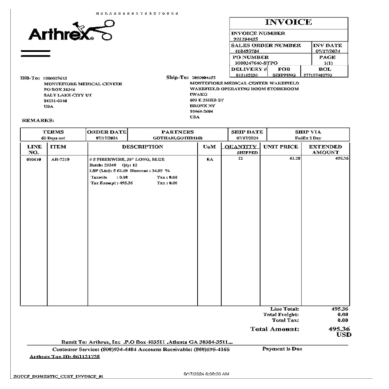

In [73]:
import numpy as np, matplotlib.pyplot as plt
from PIL import Image

img = inputs['pixel_values'][0].cpu().permute(1,2,0).numpy()
img = Image.fromarray((img*255).astype(np.uint8))

plt.imshow(img)
plt.axis("off")
plt.show()

In [78]:
with torch.inference_mode():
    generation = model.generate(**inputs.to(model.device, dtype=torch.bfloat16), max_new_tokens=1000, do_sample=False)[0]

In [83]:
len(generation[input_len:])

630

In [104]:
print(processor.decode(generation[input_len:], skip_special_tokens=True))

In [109]:
inputs = processor.apply_chat_template(
    eval_dataset[0]['messages'][:2], add_generation_prompt=True, tokenize=True,
    return_dict=True, return_tensors="pt"
)
input_len = inputs["input_ids"].shape[-1]
input_len

298

In [110]:
with torch.inference_mode():
    generation = model.generate(**inputs.to(model.device, dtype=torch.bfloat16), max_new_tokens=1000, do_sample=False)[0]

In [111]:
len(generation[input_len:])

624

In [112]:
print(processor.decode(generation[input_len:], skip_special_tokens=True))

```json
{"INV_VendorFullName": "Arthrex, Inc", "INV_InvoiceNumber": 920386902, "INV_PurchaseOrderNo": "2300113238-STPO", "INV_InvoiceDate": 43062978, "INV_AccountNumber": 2000018119, "INV_VAT": 0, "INV_ShipToAddress1": "160 N MIDLAND AVE", "INV_ShipToState": "NY", "INV_ShipToPostCode": "10960-1912", "INV_TotalAmount": 2400, "INV_ShipToFullName": "NYACK HOSPITAL", "INV_ExtdPrice_0": 2356.25, "INV_Description_0": "Qondlin Implant System, HIMM", "INV_VendorCatalogNo_0": "AR-1288Q15-LI10", "INV_Quantity_0": 1, "INV_ExtdPrice_1": "", "INV_Description_1": "", "INV_VendorCatalogNo_1": "", "INV_Quantity_1": "", "INV_ExtdPrice_2": "", "INV_Description_2": "", "INV_VendorCatalogNo_2": "", "INV_Quantity_2": "", "INV_ShipToCity": "NYACK", "INV_UOM_1": "", "INV_FreightCharge": 44.17, "INV_UOM_0": "EA", "INV_ExtdPrice_3": "", "INV_Description_3": "", "INV_VendorCatalogNo_3": "", "INV_Quantity_3": "", "INV_ExtdPrice_4": "", "INV_Description_4": "", "INV_VendorCatalogNo_4": "", "INV_Quantity_4": "", "

In [117]:
eval_dataset[0]['messages'][2]['content'][0]['text']

'```json\n{"INV_VendorFullName": "Arthrex, Inc", "INV_InvoiceNumber": 920386092, "INV_PurchaseOrderNo": "2300113238-STPO", "INV_InvoiceDate": 45355, "INV_AccountNumber": 2000018119, "INV_VAT": 0, "INV_ShipToAddress1": "160 N MIDLAND AVE", "INV_ShipToState": "NY", "INV_ShipToPostCode": "10960-1912", "INV_TotalAmount": 2400.42, "INV_ShipToFullName": "NYACK HOSPITAL", "INV_ExtdPrice_0": 2356.25, "INV_Description_0": "QuadLink Implant System, 11MM", "INV_VendorCatalogNo_0": "AR-1288QIS-110", "INV_Quantity_0": 1, "INV_ExtdPrice_1": "", "INV_Description_1": "", "INV_VendorCatalogNo_1": "", "INV_Quantity_1": "", "INV_ExtdPrice_2": "", "INV_Description_2": "", "INV_VendorCatalogNo_2": "", "INV_Quantity_2": "", "INV_ShipToCity": "NYACK", "INV_UOM_1": "", "INV_FreightCharge": 44.17, "INV_UOM_0": "EA", "INV_ExtdPrice_3": "", "INV_Description_3": "", "INV_VendorCatalogNo_3": "", "INV_Quantity_3": "", "INV_ExtdPrice_4": "", "INV_Description_4": "", "INV_VendorCatalogNo_4": "", "INV_Quantity_4": "",

In [118]:
eval_dataset[1]['messages'][2]['content'][0]['text']

'```json\n{"INV_VendorFullName": "Arthrex, Inc", "INV_InvoiceNumber": 920341437, "INV_PurchaseOrderNo": "2300111151-STPO", "INV_InvoiceDate": "03/28/2024", "INV_AccountNumber": 2000018119, "INV_VAT": 0, "INV_ShipToAddress1": "160 N MIDLAND AVE", "INV_ShipToState": "NY", "INV_ShipToPostCode": "10960-1912", "INV_TotalAmount": 865.51, "INV_ShipToFullName": "NYACK HOSPITAL", "INV_ExtdPrice_0": 850.2, "INV_Description_0": "SutureTape 1.3mm WH/BL & WH/BLK", "INV_VendorCatalogNo_0": "AR-7501", "INV_Quantity_0": 12, "INV_ExtdPrice_1": "", "INV_Description_1": "", "INV_VendorCatalogNo_1": "", "INV_Quantity_1": "", "INV_ExtdPrice_2": "", "INV_Description_2": "", "INV_VendorCatalogNo_2": "", "INV_Quantity_2": "", "INV_ShipToCity": "NYACK", "INV_UOM_1": "", "INV_FreightCharge": 15.31, "INV_UOM_0": "EA", "INV_ExtdPrice_3": "", "INV_Description_3": "", "INV_VendorCatalogNo_3": "", "INV_Quantity_3": "", "INV_ExtdPrice_4": "", "INV_Description_4": "", "INV_VendorCatalogNo_4": "", "INV_Quantity_4": "",